Random forests are robust to overfitting, can handle thousands of input variables without variable decision, and run efficiently on large datasets. A random forest seems like it could work well as our predictor for san francisco crime data. 

In [20]:
#imports 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from path import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier

In [2]:
#load data
file_path = Path("../Resources/cleaned_df.csv")
cleaned_df = pd.read_csv(file_path)
cleaned_df = cleaned_df.drop(columns=['Unnamed: 0'])
cleaned_df.head()

,Category,PdDistrict,Resolution
0,WEAPON LAWS,SOUTHERN,"ARREST, BOOKED"
1,WEAPON LAWS,SOUTHERN,"ARREST, BOOKED"
2,WARRANTS,BAYVIEW,"ARREST, BOOKED"
3,NON-CRIMINAL,TENDERLOIN,NONE
4,NON-CRIMINAL,MISSION,NONE


In [3]:
#create features
X = cleaned_df.drop("Resolution", axis=1)

#create target
y = cleaned_df["Resolution"]

In [5]:
#get dummy values for X
X = pd.get_dummies(X)
X.head()

,Category_ARSON,Category_ASSAULT,Category_BAD CHECKS,Category_BRIBERY,Category_BURGLARY,Category_DISORDERLY CONDUCT,Category_DRIVING UNDER THE INFLUENCE,Category_DRUG/NARCOTIC,Category_DRUNKENNESS,Category_EMBEZZLEMENT,...,PdDistrict_BAYVIEW,PdDistrict_CENTRAL,PdDistrict_INGLESIDE,PdDistrict_MISSION,PdDistrict_NORTHERN,PdDistrict_PARK,PdDistrict_RICHMOND,PdDistrict_SOUTHERN,PdDistrict_TARAVAL,PdDistrict_TENDERLOIN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
# train the classifier
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
brf.fit(X_train, y_train)
y_pred = brf.predict(X_test)

In [9]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 81.86%


In [10]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,8016,1785
Actual 1,4877,22121


In [11]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                      pre       rec       spe        f1       geo       iba       sup

ARREST, BOOKED       0.62      0.82      0.82      0.71      0.82      0.67      9801
          NONE       0.93      0.82      0.82      0.87      0.82      0.67     26998

   avg / total       0.84      0.82      0.82      0.83      0.82      0.67     36799



In [15]:
# List the features sorted in descending order by feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
features = cleaned_df.columns
importances = brf.feature_importances_
indices = np.argsort(importances)[::-1]

#print feature rankings
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f+1, features[f], importances[indices[f]]))

Feature ranking:
1. Category (0.245008)
2. PdDistrict (0.143568)
3. Resolution (0.121621)


IndexError: index 3 is out of bounds for axis 0 with size 3

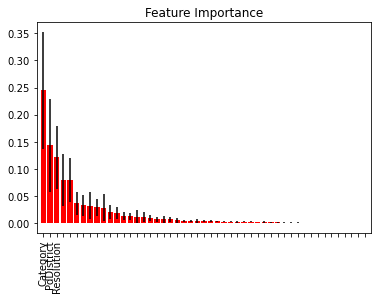

In [18]:
#print graph of feature importance 
std = np.std([tree.feature_importances_ for tree in brf.estimators_], axis=0)
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), features, rotation='vertical')
plt.xlim([-1, X.shape[1]])
plt.subplots_adjust(bottom=0.15)
plt.show()

In [21]:
# Train the Classifier
eec = EasyEnsembleClassifier(n_estimators=100, random_state=1)
eec.fit(X_train, y_train)
y_pred = eec.predict(X_test)

In [22]:
# Calculated the balanced accuracy score
balanced_acc_score = balanced_accuracy_score(y_test,y_pred)
print(f"balanced accuracy score = {balanced_acc_score*100:.2f}%")

balanced accuracy score = 81.78%


In [23]:
# Display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=["Acutal 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
display(cm_df)

,Predicted 0,Predicted 1
Acutal 0,7950,1851
Actual 1,4737,22261


In [24]:
# Print the imbalanced classification report
print("imbalanced classification report")
print(classification_report_imbalanced(y_test,y_pred))

imbalanced classification report
                      pre       rec       spe        f1       geo       iba       sup

ARREST, BOOKED       0.63      0.81      0.82      0.71      0.82      0.67      9801
          NONE       0.92      0.82      0.81      0.87      0.82      0.67     26998

   avg / total       0.84      0.82      0.81      0.83      0.82      0.67     36799

